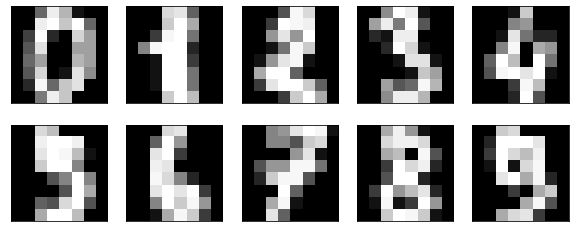

Sequential(
  (0): Linear(in_features=64, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
)
Epoch 0 loss_train 2.4206299781799316 loss_test 2.49483323097229
Epoch 10 loss_train 0.21194544434547424 loss_test 0.22731781005859375
Epoch 20 loss_train 0.05405622720718384 loss_test 0.11940981447696686
Epoch 30 loss_train 0.01428616140037775 loss_test 0.1112370491027832
Epoch 40 loss_train 0.004090096335858107 loss_test 0.10729353874921799
Epoch 50 loss_train 0.0016296864487230778 loss_test 0.13064248859882355
Epoch 60 loss_train 0.0009385114535689354 loss_test 0.12296675890684128
Epoch 70 loss_train 0.0006580338813364506 loss_test 0.11684294790029526
Epoch 80 loss_train 0.0005101233255118132 loss_test 0.12002918124198914
Epoch 90 loss_train 0.000423045945353806 loss_test 0.12202253192663193


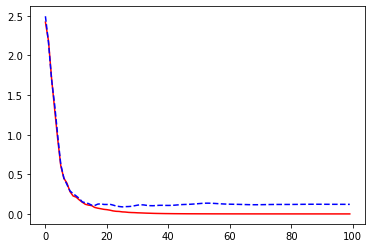

正解率: 96.88888888888889%


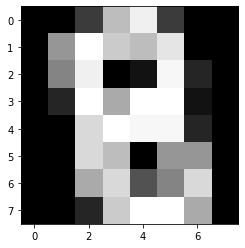

正解: 8 予測結果: 8


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

digits_data = datasets.load_digits()

n_img = 10 
plt.figure(figsize=(10,4))
for i in range(n_img):
    ax = plt.subplot(2,5,i+1)
    plt.imshow(digits_data.data[i].reshape(8,8),cmap="Greys_r")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# train data, validation data 
import torch
from sklearn.model_selection import train_test_split

digit_images = digits_data.data
labels = digits_data.target
x_train,x_test,t_train,t_test = train_test_split(digit_images,labels)

# to tensor
x_train = torch.tensor(x_train,dtype=torch.float32)
x_test = torch.tensor(x_test,dtype=torch.float32)
t_train = torch.tensor(t_train,dtype=torch.int64)
t_test = torch.tensor(t_test,dtype=torch.int64)

from torch import nn

net = nn.Sequential(nn.Linear(64,128),
                    nn.ReLU(),
                    nn.Linear(128,64),
                    nn.ReLU(),
                    nn.Linear(64,10))
print(net)

# training
from torch import optim

loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(),lr=0.01)

history_loss_train = list()
history_loss_test = list()

n_epoch = 100
for i in range(n_epoch):
        optimizer.zero_grad()
        
        y_train = net(x_train)
        y_test =  net(x_test)
        
        loss_train = loss(y_train,t_train)
        loss_test = loss(y_test,t_test)
        history_loss_train.append(loss_train.item())
        history_loss_test.append(loss_test.item())
        
        loss_train.backward()
        optimizer.step()
        
        if i % 10 == 0 :
            print("Epoch",i,"loss_train",loss_train.item(),"loss_test",loss_test.item())

plt.plot(range(len(history_loss_train)),history_loss_train,"r-")
plt.plot(range(len(history_loss_test)),history_loss_test,"b--")
plt.show()

# 正解率
y_test = net(x_test)
count = (y_test.argmax(1) == t_test).sum().item()
print("正解率:", str(count/len(y_test)*100)+"%")

img_id = 500
x_pred = digit_images[img_id]
image = x_pred.reshape(8,8)
plt.imshow(image,cmap="Greys_r")
plt.show()

x_pred = torch.tensor(x_pred,dtype=torch.float32)
y_pred = net(x_pred)
print("正解:",labels[img_id],"予測結果:",y_pred.argmax().item())